In [136]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# %bash
# !pip install plotly 

In [215]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Code"></form>''')

In [221]:
# from IPython.display import HTML
# HTML('''
# <script>
#   $(document).ready(function(){
#     $('div.prompt').hide();
#     $('div.back-to-top').hide();
#     $('nav#menubar').hide();
#     $('.breadcrumb').hide();
#     $('.hidden-print').hide();
#   });
# </script>

# <footer id="attribution" style="float:right; color:#999; background:#fff;">
# Created with Jupyter, delivered by Fastly, rendered by Rackspace.
# </footer>''')

<br>

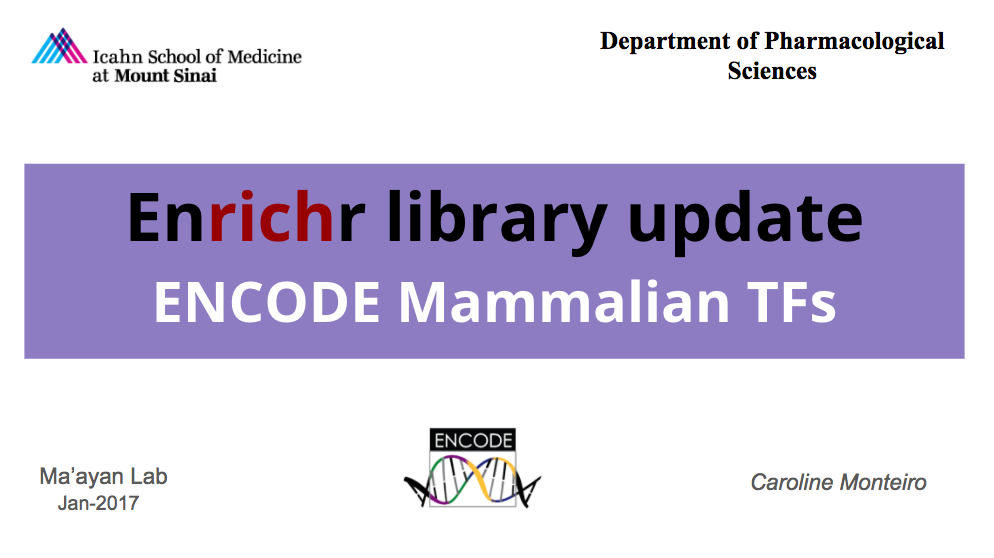

In [519]:
# Slide1 Completo
from IPython.display import Image
Image('figures/Slide1.png', width='1000')

<br><br>

In [520]:
from IPython.display import Image
Image('figures/Line1.png', width='1200')

<br><br>

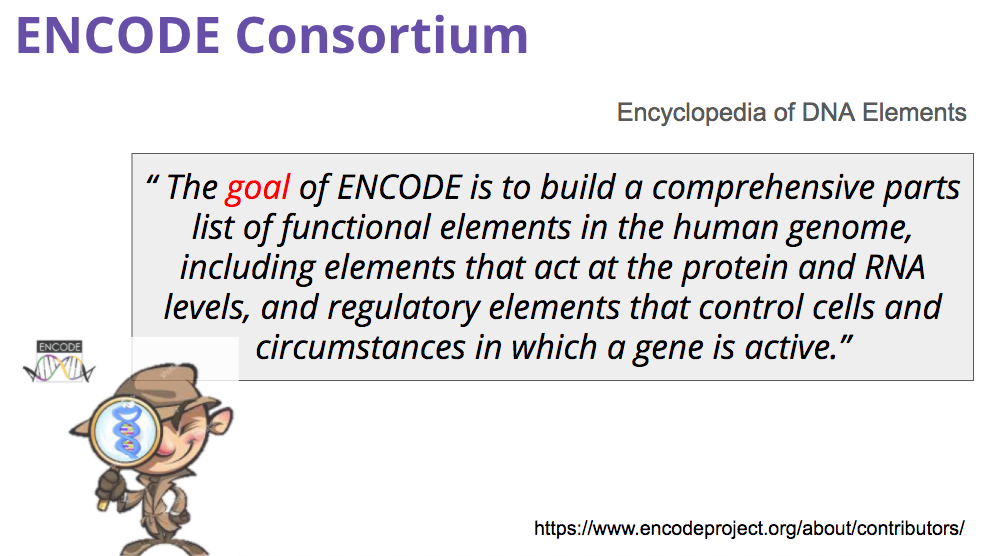

In [521]:
from IPython.display import Image
Image('figures/encode01.png', width='900')

<br><br>

In [522]:
from IPython.display import Image
Image('figures/Line1.png', width='1100')

# ChIP-Seq

* Combines of chromatin immunoprecipitation (ChIP) with  sequencing.
* Identifying genome-wide DNA binding sites for transcription factors and other proteins.


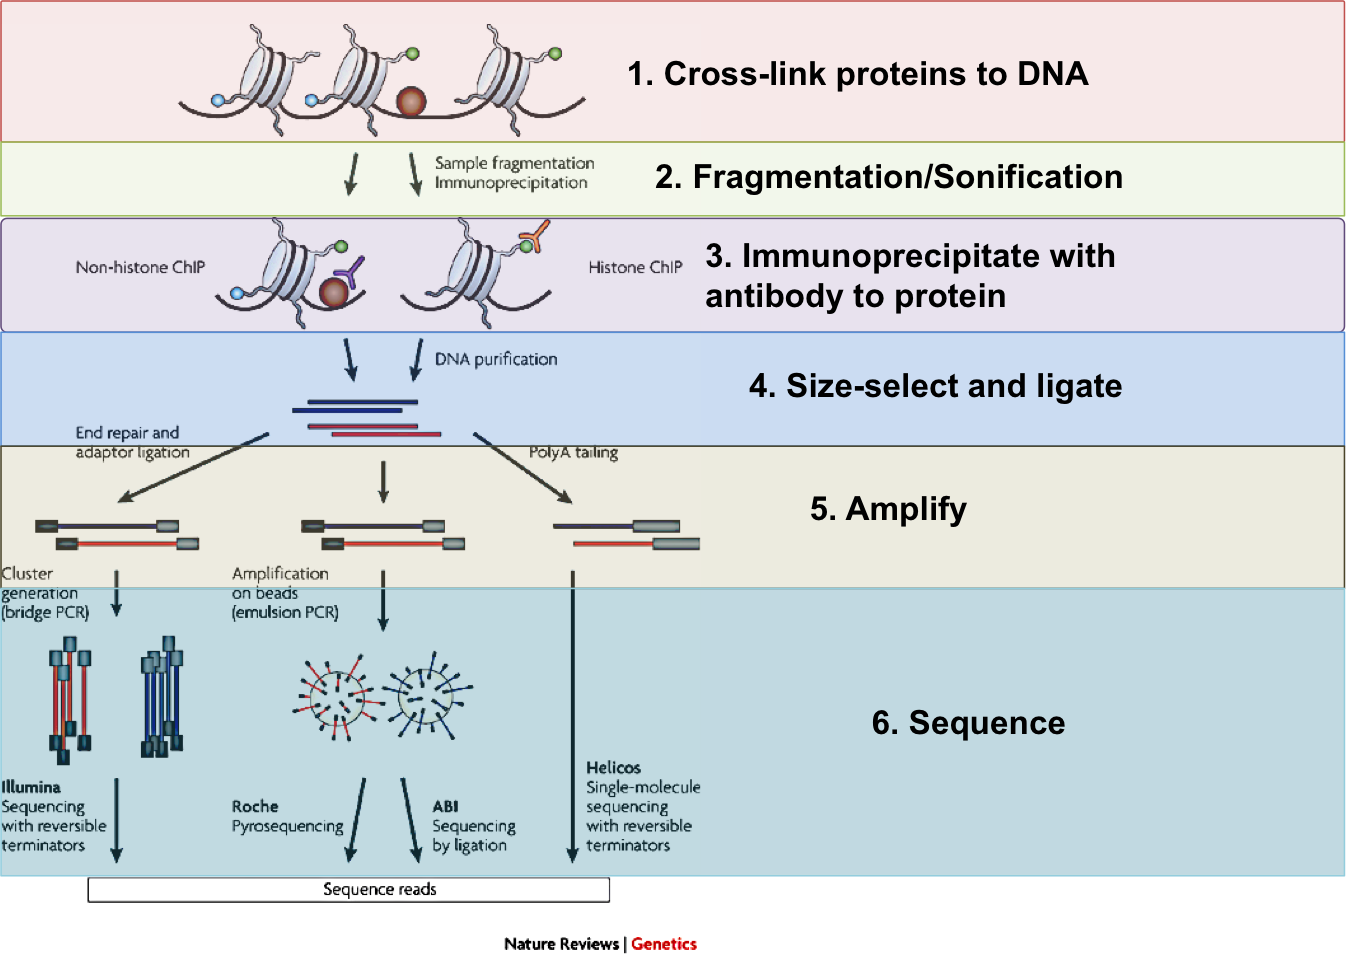

In [523]:
from IPython.display import Image
Image('figures/chip-sep_eu.png', width='1000') 

In [524]:
from IPython.display import Image
Image('figures/Line1.png', width='1100')

<h1><center>ENCODE Enrichr Library</center></h1>

__Previous Updates:__<br> 
2014 - Yan Kou<br> 
2015 - Andrew (matlab)
* Andrew Matlab code is available on [Harmonizome](http://amp.pharm.mssm.edu/Harmonizome/dataset/ENCODE+Transcription+Factor+Targets) under Script <br> 

With that goal the The ENCODE Consortium produces an enormous amount of data, generationg transcriptomics, proteomics, all kinds of data,in various cell lines and multiple assays. 

In short they generate a lot of data that..we can use, it's freely available and parts of it have been used to create Gene Set Libraries for Enrichr. Including a Mammalian transcriptor factor/target gene set library.

The Enrichr libraries are updated periodically.

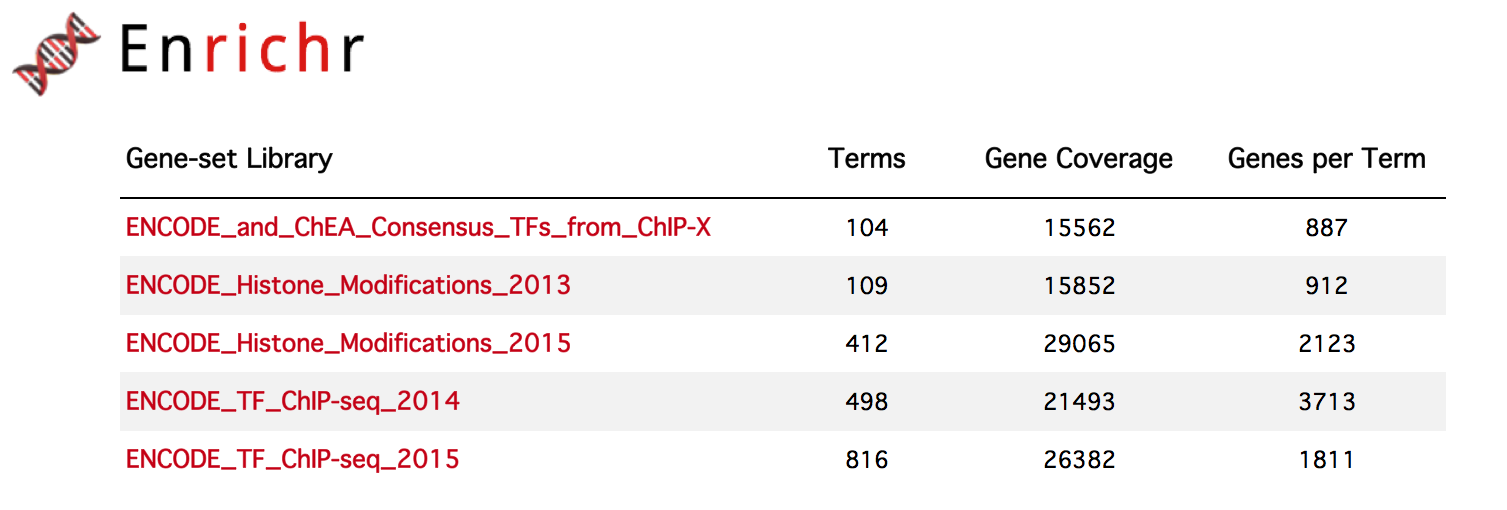

In [525]:
from IPython.display import Image
Image('figures/enrichr_encode_libraries.png', width='900')

The reason why I'm presenting and creating this notebook its first because, it needs to be updated and the second is bacause, the methods for the last update and from the implementation are not all that easily available and most of what we have was done in matlab.

This is an attempt to convert it to python and document the process.


# Query

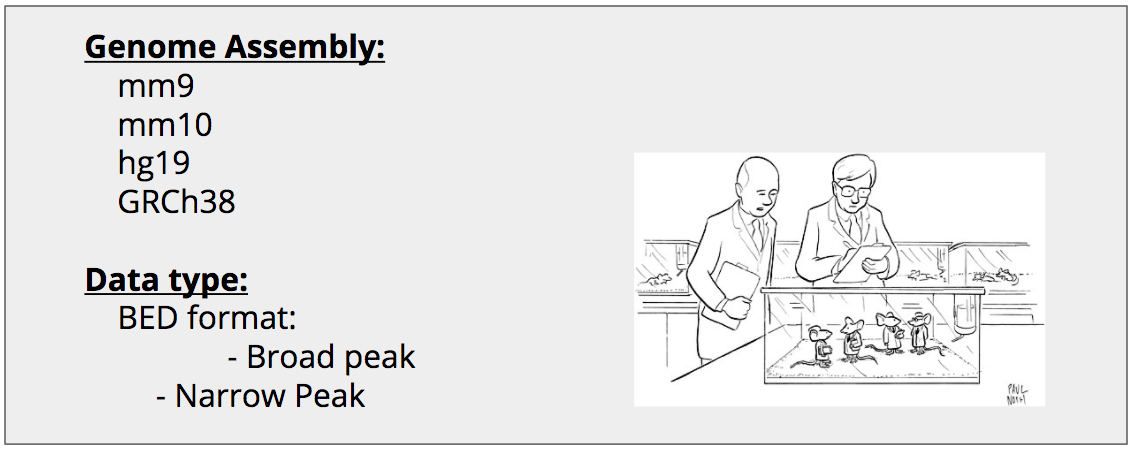

In [526]:
from IPython.display import Image
Image('figures/query.png', width='1000')

In [527]:
from IPython.display import Image
Image('figures/Line1.png', width='1000')

In [576]:
from IPython.core.display import display, HTML
display(HTML('''<table>
        <tr> 
          <td><img src="figures/peak_types.png" alt="" border=1 height=100 width=900></img></td>
          </tr><th><br> For most TFs, the enriched regions are discrete and form a sharp peaks that covers short 
          regions  of DNA (10s or 100s of bases), but the read distribution for many types of histone modification 
          follows a continuous property and span regions of up to several hundred kilobases.
            <br><br>
            Therefore the <i>Bed NARROW file format</i> provides signal enrichment for peaks, based on pooled, 
            normalized (interpreted) data.
            <br><br>
            <i>Bed BROAD peak files</i> refer to regions of enriched signal.
            A lot longer than the enriched peak.
          <br><br>
          The <i>Mixed sources or gapped files</i>
        </th><br> 
         </td>'''))

,"For most TFs, the enriched regions are discrete and form a sharp peaks that covers short regions of DNA (10s or 100s of bases), but the read distribution for many types of histone modification follows a continuous property and span regions of up to several hundred kilobases. Therefore the Bed NARROW file format provides signal enrichment for peaks, based on pooled, normalized (interpreted) data. Bed BROAD peak files refer to regions of enriched signal. A lot longer than the enriched peak. The Mixed sources or gapped files"


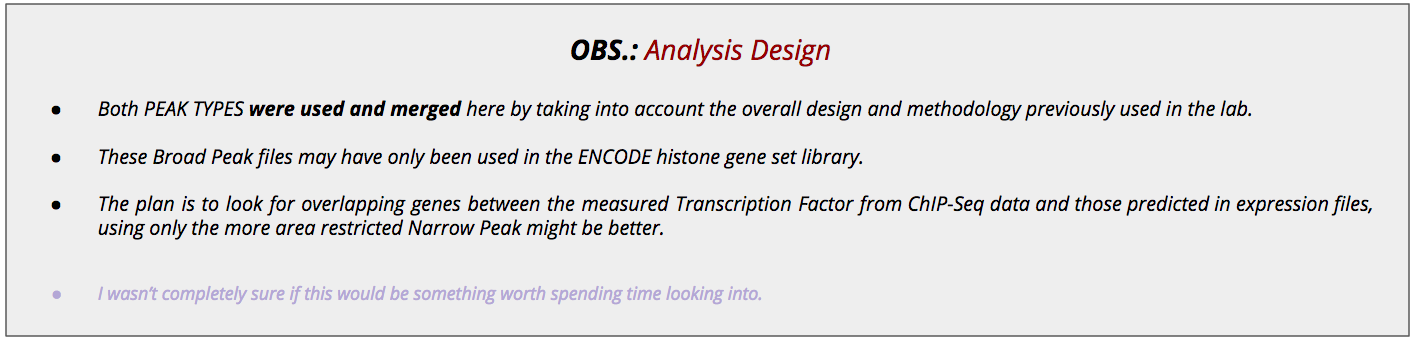

In [564]:
from IPython.display import Image
Image('figures/Analysis_design.png',width='1000')

<br><br>

In [565]:
from IPython.display import Image
Image('figures/Line1.png', width='1000')

<br>

# Query  - API or Experiment Matrix

Encode provides an easy to use API for that, but they also offer  this matrix as an alternative, which is really easy to use and gives a fast and simple overall view of the data. 
Select by assay, target and any combination of attributes. <br><br>
__Link to search result matrix:__ [Encode search url](https://www.encodeproject.org/matrix/?type=Experiment&status=released&assay_slims=DNA+binding&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&award.project=ENCODE&replicates.library.biosample.donor.organism.scientific_name=M
us+musculus&assembly=hg19&assembly=mm10&assembly=mm9&files.file_type=bed+broadPeak&files.file_type=bed+narrowPeak)
<br><br>
Downloading the selected matrix will return a text file containing the urls of all the files in gzip format. The first line of this text file corresponds to the url of the metadata file. <br>

*That being said I REALLY think we should borrow a bit from it.  
Its straightforward and with something like this the user could select the data and send it to, for example, Alexe’s RNA-seq pipeline or any other canned analysis.
This returns a list of urls. The first link to the metadata and the rest to the bed files.*
<br>

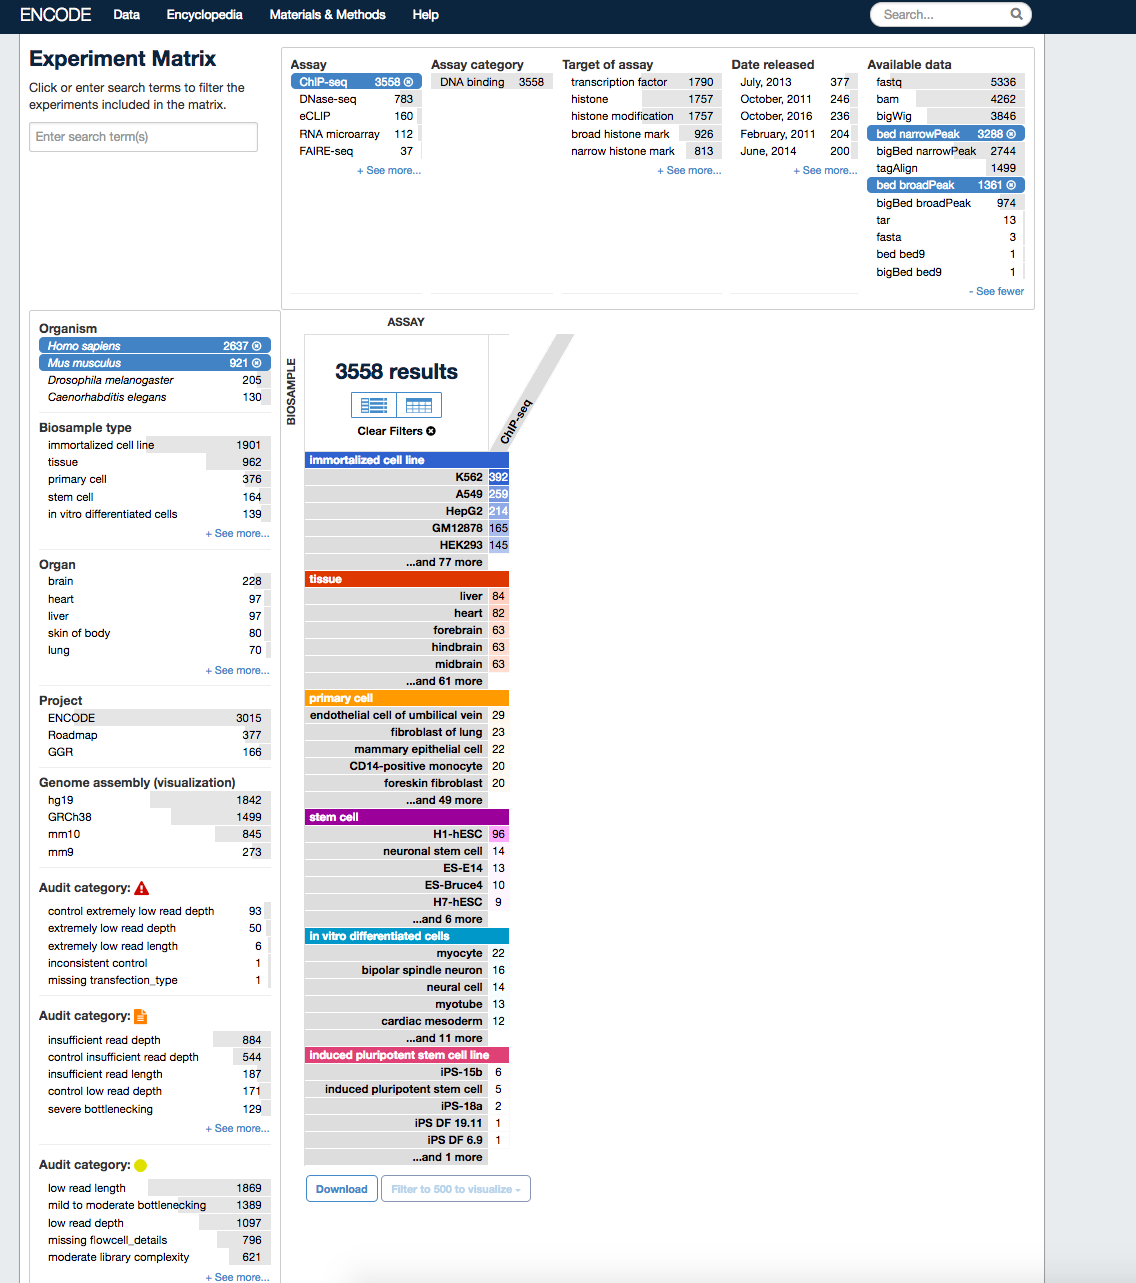

In [228]:
from IPython.display import Image
Image('figures/encode_matrix.png', width='900')

In [ ]:
#!/usr/bin/python

# Packages 
from ipywidgets import *
import pandas as pd
import glob
import numpy as np
import os
import re
import json
import requests
import csv
import requests
import urllib2
import StringIO
import gzip
import matplotlib.pyplot as plt

---------------------------------------------------------------------------------------------------------------------
# Processing

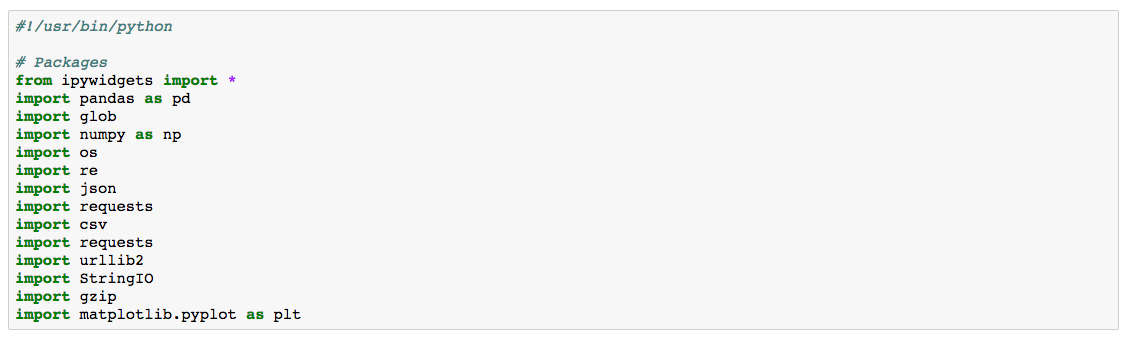

In [561]:
from IPython.display import Image
Image('figures/py_packages.png', width='1100')

# Get Metadata
The first line of the text file is a link to the metadata.

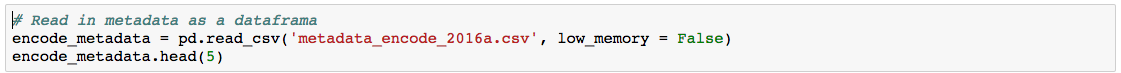

In [563]:
from IPython.display import Image
Image('figures/matadata_df.png', width='1200')

In [531]:
# Read in metadata as a dataframa
encode_metadata = pd.read_csv('metadata_encode_2016a.csv', low_memory = False)
encode_metadata.head(5)

,File accession,File format,Output type,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample life stage,Biosample sex,...,md5sum,File download URL,Assembly,Platform,Controlled by,File Status,Audit WARNING,Audit INTERNAL_ACTION,Audit NOT_COMPLIANT,Audit ERROR
0,ENCFF001UNF,bed broadPeak,peaks,ENCSR000BUY,ChIP-seq,EFO:0001203,MCF-7,immortalized cell line,adult,female,...,ed38658d476c7a47956503c41f3f8070,https://www.encodeproject.org/files/ENCFF001UN...,hg19,NaN,NaN,released,NaN,biological replicates with identical biosample,NaN,NaN
1,ENCFF001UNG,bed broadPeak,peaks,ENCSR000BUY,ChIP-seq,EFO:0001203,MCF-7,immortalized cell line,adult,female,...,ab0f810e5026d652c64ae6efbe6577fd,https://www.encodeproject.org/files/ENCFF001UN...,hg19,NaN,NaN,released,NaN,biological replicates with identical biosample,NaN,NaN
2,ENCFF001YBT,bed broadPeak,peaks,ENCSR000DHY,ChIP-seq,EFO:0005233,CH12.LX,immortalized cell line,unknown,female,...,1a69534e5aceb9215e993aacf5532a54,https://www.encodeproject.org/files/ENCFF001YB...,mm9,NaN,NaN,archived,inconsistent platforms,NaN,NaN,NaN
3,ENCFF001YBU,bed broadPeak,peaks,ENCSR000DHY,ChIP-seq,EFO:0005233,CH12.LX,immortalized cell line,unknown,female,...,b22e1e7bf814543fb9fafedad1a732e2,https://www.encodeproject.org/files/ENCFF001YB...,mm9,NaN,NaN,archived,inconsistent platforms,NaN,NaN,NaN
4,ENCFF001YBV,bed broadPeak,peaks,ENCSR000DHY,ChIP-seq,EFO:0005233,CH12.LX,immortalized cell line,unknown,female,...,01562b3870caac196b27c6359d638eb8,https://www.encodeproject.org/files/ENCFF001YB...,mm9,NaN,NaN,archived,inconsistent platforms,NaN,NaN,NaN


In [ ]:
from IPython.display import Image
Image('figures/encode_metadata_shape.png', width='1200')

In [532]:
#### Number of entries in the original metadata file
encode_metadata.shape

(18846, 48)

In [ ]:
encode_metadata.shape

In [533]:
# Filter out experiments we are not interested in, mainly histones, Pol modifications and treated samples.

value_list = ['H3K27me3-mouse', 'H3K36me3-human', 'H3K4me3-human', 'H3K4me1-mouse',
              'H3K27me3-human', 'H3K9me3-mouse', 'H3K4me2-human', 'H3K9ac-human', 
              'H3K79me2-human','H3K27ac-human', 'H3K4me3-mouse', 'H3K27ac-mouse',
              'H3K4me1-human', 'H3K9me3-human', 'H3K36me3-mouse', 'H3K4me2-mouse', 
              'H3K9me2-human', 'H3K9ac-mouse', 'H3K79me2-mouse', 'H3K79me3-mouse', 
              'H3K9me1-human','POLR2AphosphoS2-human', 'POLR2AphosphoS5-human',
              'POLR2AphosphoS2-mouse','POLR2AphosphoS5-mouse','POLR2AphosphoS2-human', 
              'H3F3A-human','H2AFZ-human','H3ac-mouse']

encode_metadata = encode_metadata[~encode_metadata.Experiment_target.isin(value_list)]


value_list_treatment = ['17Ô_-estradiol','17ï_-estradiol','dimethyl sulfoxide',
                        'dimethyl sulfoxide','forskolin and pyruvate',
                        'tumor necrosis factor','pravastatin','dexamethasone', 
                        'all-trans-retinoic acid', '17‘_-estradiol','ethanol',
                        'interferon gamma','afimoxifene','interferon alpha', 
                        'estradiol', 'bisphenol A', 'genistein',
                        'insulin and 22-hydroxycholesterol',
                        '17‘_-hydroxy-17-methylestra-4,9,11-trien-3-one']

encode_metadata = encode_metadata[~encode_metadata.Biosample_treatments.isin(value_list_treatment)]
encode_metadata.shape

(9159, 48)

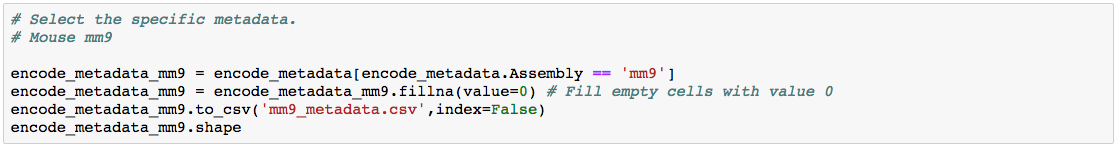

In [567]:
from IPython.display import Image
Image('figures/encode_metadata_mm9_shape.png', width='1200')

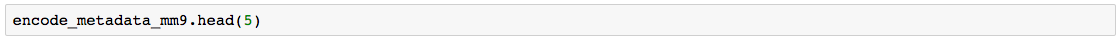

In [568]:
from IPython.display import Image
Image('figures/encode_mm9_head.png', width='1200')

In [242]:
encode_metadata_mm9.head(5)

,File accession,File_format,Output type,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample life stage,Biosample sex,...,md5sum,File download URL,Assembly,Platform,Controlled by,File Status,Audit WARNING,Audit INTERNAL_ACTION,Audit NOT_COMPLIANT,Audit ERROR
0,ENCFF001YIS,bed narrowPeak,peaks,ENCSR000EQW,ChIP-seq,EFO:0005233,CH12.LX,immortalized cell line,unknown,female,...,9927430ebe79693f704c28f129a60df7,https://www.encodeproject.org/files/ENCFF001YI...,mm9,0,0,released,"borderline replicate concordance, low read dep...",0,0,0
1,ENCFF001YHQ,bed narrowPeak,peaks,ENCSR000ERC,ChIP-seq,EFO:0005233,CH12.LX,immortalized cell line,unknown,female,...,4e1fd93b70bb35c7ca9e554fc7082e7c,https://www.encodeproject.org/files/ENCFF001YH...,mm9,0,0,released,"low read depth, mild to moderate bottlenecking...",NTR biosample,0,0
2,ENCFF001YIR,bed narrowPeak,peaks,ENCSR000EQQ,ChIP-seq,EFO:0005233,CH12.LX,immortalized cell line,unknown,female,...,dcbb9824da0903cd486ab681092a1ccd,https://www.encodeproject.org/files/ENCFF001YI...,mm9,0,0,released,"low read depth, mild to moderate bottlenecking...",0,0,0
3,ENCFF001YIL,bed narrowPeak,peaks,ENCSR000ERK,ChIP-seq,EFO:0005233,CH12.LX,immortalized cell line,unknown,female,...,d18db7a9eb9d9900ca7f08d585be81b2,https://www.encodeproject.org/files/ENCFF001YI...,mm9,0,0,released,"low read depth, mild to moderate bottlenecking...",0,0,0
4,ENCFF439VGN,bed narrowPeak,peaks,ENCSR980YXJ,ChIP-seq,EFO:0005233,CH12.LX,immortalized cell line,unknown,female,...,33dcf7a9e37f913b47364966c809e803,https://www.encodeproject.org/files/ENCFF439VG...,mm9,0,0,released,"low read depth, mild to moderate bottlenecking...",experiment not submitted to GEO,0,0


# Get BED files
ENCODE provides API support for bulk download. The following shell script will download all files in your my_list.txt file.
This can that quite some time given the size of the datasets. It's commented out since we don't want to download it everytime the notebook runs.

Import Interactive shell and ran bash<br>
Mouse mm9<br>

<br>
from IPython.core.interactiveshell import InteractiveShell<br>
InteractiveShell.ast_node_interactivity = "all"<br>
<br>
<br>
%%bash<br>
xargs -n 1 curl -O -L < /Users/Carol/Desktop/ENCODE_eu/my_list.txt<br>

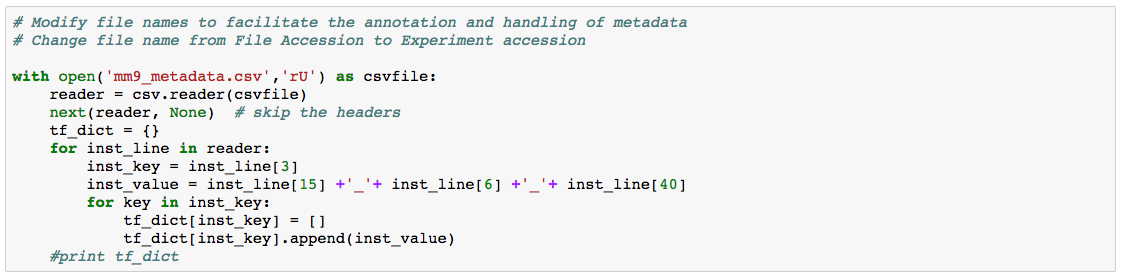

In [569]:
from IPython.display import Image
Image('figures/dict.png', width='1200')

<br><br>
# Annotate chromosomal region to gene¶
Originally we were going to use Enrichrs API to annotate the files, but currently Enrichr only supports manual upload of Bed files. 

Alex suggested Homer software to Annotate the peaks.

In [474]:
from IPython.core.display import display, HTML
display(HTML('''<table>
        <tr> 
          <td><img src="figures/homer02.png" alt="" border=1 height=200 width=1100></img></td>
          <tr>
          <td>
          <br> -- Peaks can be easily annotated Homers <b>annotatepeaks.pl</b> to the default or given reference genome.<br><br>
          <h2><u><center>The Annotation Process is divided in two main parts:<br></u></center></h2><br>
              <center><b>I -</b> Distance to nearest TSS >> Assigns peak to gene,<br></center><br>
              <center><b>II -</b> Determines the genomic annotation of the region<br>occupied by the center of the peak/region.</center><br>
                <br><br><h3>I - Distance to nearest TSS</h3><br>
                <br>
                By default, annotatePeaks.pl loads a file in the <br>
                "/path-to-homer/data/genomes/<genome>/<genome>.tss" that contains the positions of RefSeq <br>
                transcription start sites.  It uses these positions to determine the closest TSS, reporting <br>
                the distance (negative values mean upstream of the TSS, positive values mean downstream), and <br>
                various annotation information linked to locus including alternative identifiers (unigene, entrez gene, <br>
                ensembl, gene symbol etc.).  This information is also used to link gene-specific information (see below) <br>
                to a peak/region, such as gene expression.<br>
                <br><br><h3> II - Genomic Annotation</h3><br><br>
                <br>
                To annotate the location of a given peak in terms of important genomic features, <br>
                annotatePeaks.pl calls a separate program (assignGenomeAnnotation) to efficiently <br>
                assign peaks to one of millions of possible annotations genome wide. <br> 
                Two types of output are provided.  The first is "Basic Annotation" that includes whether <br>
                a peak is in the TSS (transcription start site), TTS (transcription termination site), <br>
                Exon (Coding), 5' UTR Exon, 3' UTR Exon, Intronic, or Intergenic, which are common annotations <br>
                that many researchers are interested in.  A second round of "Detailed Annotation" <br>
                also includes more detailed annotation, also considering repeat elements and CpG islands. <br>
                Since some annotation overlap, a priority is assign based on the following <br>
                (in case of ties it's random [i.e. if there are two overlapping repeat element annotations]):<br>
                <br>
                <br><b> 1.</b> TSS (by default defined from -1kb to +100bp)<br>
                <br><b> 2.</b> TTS (by default defined from -100 bp to +1kb)<br>
                <br><b> 3.</b> CDS Exons<br>
                <br><b> 4.</b> 5' UTR Exons<br>
                <br><b> 5.</b> 3' UTR Exons<br>
                <br><b> 6.</b> **CpG Islands<br>
                <br><b> 7.</b> **Repeats<br>
                <br><b> 8.</b> Introns<br>
                <br><b> 9.</b> Intergenic<br>
              <br><b><h3>Basic usage:</b></h3><br>
          <img src="figures/annotatePeaks_pl.png" alt="" border=1 height=400 width=1000></img><br>
          <br>
          <br>Annotate <b>multiple</b> files from directory:<img src="figures/annotateFiles.png" alt="" border=1 height=100 width=1200></img><br>
         <br><h3>Useful Flags:</h3>
         <br><b> -annStats:</b> Saves Peaks Annotation Statistics to file.<br>
         <br><b> -gtf:</b> Select a different gtf file other than default<br>
         <br><b> -d:</b> TagDirectory – counts reads in features<br>
         <br><b> -m:</b> motif – counts motifs/ locates motif positions in features<br>
          <br><b>-p:</b> peak/BED file – another way to identify overlapping features<br>

         <br><i>In the notebook annotatepeaks.pl is commented out as to not re-run it everytime the notebook is loaded. It should be run from the Homer/bin directory.</i><br>
         </br>
         </tr>
         </td>'''))

""
"-- Peaks can be easily annotated Homers annotatepeaks.pl to the default or given reference genome. The Annotation Process is divided in two main parts: I - Distance to nearest TSS >> Assigns peak to gene, II - Determines the genomic annotation of the regionoccupied by the center of the peak/region. I - Distance to nearest TSS By default, annotatePeaks.pl loads a file in the ""/path-to-homer/data/genomes//.tss"" that contains the positions of RefSeq transcription start sites. It uses these positions to determine the closest TSS, reporting the distance (negative values mean upstream of the TSS, positive values mean downstream), and various annotation information linked to locus including alternative identifiers (unigene, entrez gene, ensembl, gene symbol etc.). This information is also used to link gene-specific information (see below) to a peak/region, such as gene expression. II - Genomic Annotation To annotate the location of a given peak in terms of important genomic features, annotatePeaks.pl calls a separate program (assignGenomeAnnotation) to efficiently assign peaks to one of millions of possible annotations genome wide. Two types of output are provided. The first is ""Basic Annotation"" that includes whether a peak is in the TSS (transcription start site), TTS (transcription termination site), Exon (Coding), 5' UTR Exon, 3' UTR Exon, Intronic, or Intergenic, which are common annotations that many researchers are interested in. A second round of ""Detailed Annotation"" also includes more detailed annotation, also considering repeat elements and CpG islands. Since some annotation overlap, a priority is assign based on the following (in case of ties it's random [i.e. if there are two overlapping repeat element annotations]): 1. TSS (by default defined from -1kb to +100bp) 2. TTS (by default defined from -100 bp to +1kb) 3. CDS Exons 4. 5' UTR Exons 5. 3' UTR Exons 6. **CpG Islands 7. **Repeats 8. Introns 9. Intergenic Basic usage: Annotate multiple files from directory: Useful Flags: -annStats: Saves Peaks Annotation Statistics to file. -gtf: Select a different gtf file other than default -d: TagDirectory – counts reads in features -m: motif – counts motifs/ locates motif positions in features -p: peak/BED file – another way to identify overlapping features In the notebook annotatepeaks.pl is commented out as to not re-run it everytime the notebook is loaded. It should be run from the Homer/bin directory."


To map the files - Non Default annotation - UCSC<br>
from IPython.core.interactiveshell import InteractiveShell<br>
InteractiveShell.ast_node_interactivity = "all"<br>
<br>
%%bash<br>
annotatePeaks.pl <bed_file> <genome> < output.file 



<br>
<br>for file in /Users/Carol/Desktop/EncodeUCSC/bed_files/*.bed; do<br>
     annotatePeaks.pl $file mm9 -gtf ucsc_mm9.gtf > $file.txt -annStats $file.csv<br>
 done<br>
 <br>

In [ ]:
# To map the files - Non Default annotation - UCSC
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# %%bash
# annotatePeaks.pl <bed_file> <genome> < output.file

# for file in /Users/Carol/Desktop/EncodeUCSC/bed_files/*.bed; do
#     annotatePeaks.pl $file mm9 -gtf ucsc_mm9.gtf > $file.txt -annStats $file.csv
# done

# Peak Stats file example


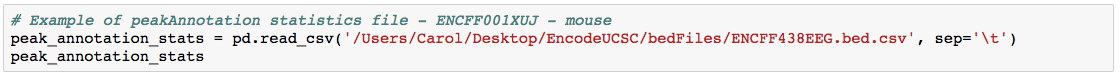

In [570]:
from IPython.display import Image
Image('figures/peak_file_ex.png', width='1200')

In [542]:
# Example of peakAnnotation statistics file - ENCFF001XUJ - mouse
peak_annotation_stats = pd.read_csv('/Users/Carol/Desktop/EncodeUCSC/bedFiles/ENCFF438EEG.bed.csv', sep='\t')
peak_annotation_stats

,Annotation,Number of peaks,Total size (bp),Log2 Enrichment
0,TTS,240.0,26068869,0.139
1,Exon,424.0,58356044,-0.203
2,Intron,8591.0,921891496,0.156
3,Intergenic,12139.0,1606287036,-0.146
4,Promoter,688.0,28115345,1.549
5,Annotation,Number of peaks,Total size (bp),Log2 Enrichment
6,3UTR,160.0,19652791,-0.038
7,Other,17.0,7174623,-1.819
8,RNA,0.0,113953,-14.431
9,miRNA,1.0,19287,2.633


# Example of Peak annotated file

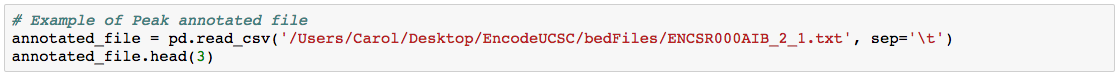

In [572]:
from IPython.display import Image
Image('figures/annotate_peak.png', width='1200')


In [541]:
# Example of Peak annotated file
annotated_file = pd.read_csv('/Users/Carol/Desktop/EncodeUCSC/bedFiles/ENCSR000AIB_2_1.txt', sep='\t')
annotated_file.head(3)

,PeakID (cmd=annotatePeaks.pl /Users/Carol/Desktop/EncodeUCSC/bed_files/ENCFF001XUR.bed mm9 -gtf /Users/Carol/Desktop/Programs/Homer/bin/Mus_musculus_UCSC_mm9/Mus_musculus/UCSC/mm9/Annotation/Archives/archive-2015-07-17-14-33-26/Genes/genes.gtf -annStats /Users/Carol/Desktop/EncodeUCSC/bed_files/ENCFF001XUR.bed.csv),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,11847-C2C12-60h-CEBPb.50mers306,chr1,136351925,136352230,+,0,NaN,promoter-TSS (NM_153128),promoter-TSS (NM_153128),-55,NM_153128,240756.0,Mm.87398,NM_153128,ENSMUSG00000026455,Klhl12,C3ip1,kelch-like 12,protein-coding
1,11847-C2C12-60h-CEBPb.50mers312-11,chr7,152401429,152401797,+,0,NaN,Intergenic,"intron (NR_132644, intron 24 of 24)",-7589,NR_033626,100040049.0,Mm.102235,NR_033626,NaN,1810010D01Rik,Gm2572,RIKEN cDNA 1810010D01 gene,ncRNA
2,11847-C2C12-60h-CEBPb.50mers612,chr15,99494979,99495227,+,0,NaN,Intergenic,Intergenic,-6046,NM_009597,11419.0,Mm.440107,NM_009597,ENSMUSG00000023017,Asic1,AI843610|ASIC|ASIC1a|Accn2|B530003N02Rik|BNaC2,acid-sensing (proton-gated) ion channel 1,protein-coding


In [ ]:
# Annotated file

In [74]:
#annotated_file.info()
#annotated_file.describe()

# Finding nearest to TSS

# Merge Peak Annotation Files

In [ ]:
# path = '/EncodeUCSC/bedFile/' 

# files = glob.glob(os.path.join(path, '*.txt')) # All txt files in folder
# fids = np.unique([file.split('_')[0] for file in files])  ## unique accession IDs

# for fid in fids:
#     df_ = pd.DataFrame()
#     for fname in files:
#         if fid in fname:
#             df = pd.read_csv(fname, sep='\t', header=0)
#             df.columns = ['ID ', 'Chr', 'Start', 'End', 'Strand', 'Peak Score', 
#                           'Focus Ratio/Region Size', 'Annotation', 'Detailed Annotation', 
#                           'Distance', 'PromoterID', 'EntrezID', 'Unigene', 'Refseq', 'Ensembl', 
#                           'GeneName', 'GeneAlias', 'GeneDescription', 'GeneType']
#             df_ = pd.concat((df_, df))
#     df_ = df_.groupby('GeneName').agg(np.mean) # group duplicated genes by the mean
#     # Here groupby is combining the results into a data structure based on the mean. groupby gene name than aplly the the function mean 
#     # to the resulting groups
#     df = df_[(df_.Distance <= 2000) & (df_.Distance >= -2000)] # Use a single column's value to select data
#     # reindexing allows you to add/change/delete the index on a specified axis
#     df = df.reindex(df.Distance.abs().sort_values(inplace=False, ascending=True).index) # sorts by abs value, then reorganizes gene column with the index
#     df_2000 = df[:3000]
#     df_2000.to_csv(fid,sep='\t') # save output file by file name

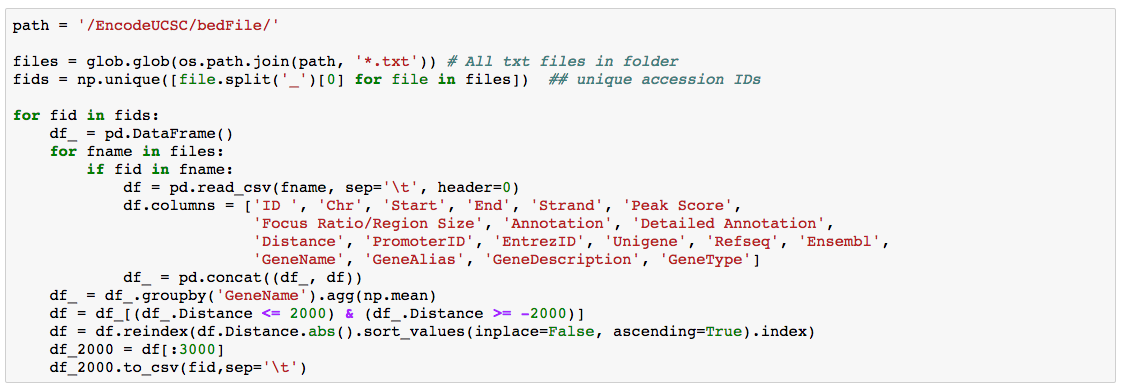

In [573]:
from IPython.display import Image
Image('figures/top_tf_hunt.png', width='1200')


In [ ]:
path = '/EncodeUCSC/bedFile/' 

files = glob.glob(os.path.join(path, '*.txt')) # All txt files in folder
fids = np.unique([file.split('_')[0] for file in files])  ## unique accession IDs

for fid in fids:
    df_ = pd.DataFrame()
    for fname in files:
        if fid in fname:
            df = pd.read_csv(fname, sep='\t', header=0)
            df.columns = ['ID ', 'Chr', 'Start', 'End', 'Strand', 'Peak Score', 
                          'Focus Ratio/Region Size', 'Annotation', 'Detailed Annotation', 
                          'Distance', 'PromoterID', 'EntrezID', 'Unigene', 'Refseq', 'Ensembl', 
                          'GeneName', 'GeneAlias', 'GeneDescription', 'GeneType']
            df_ = pd.concat((df_, df))
    df_ = df_.groupby('GeneName').agg(np.mean)   
    df = df_[(df_.Distance <= 2000) & (df_.Distance >= -2000)]   
    df = df.reindex(df.Distance.abs().sort_values(inplace=False, ascending=True).index) 
    df_2000 = df[:3000]
    df_2000.to_csv(fid,sep='\t')

# Create GMT file
This file will be used to updated Enrichrs library.

In [ ]:
# Creating GCT files

files = os.listdir("/annotatedPeaks")

df_ = pd.DataFrame()

for f in files:
    fname = "/annotatedPeaks/"+f
    for f in f:
        df = pd.read_csv(fname, sep='\t', header=0)
        df = df[['GeneName']]
        df= df.rename(columns = {'GeneName':fname})
        df = df.T
    df_ = pd.concat((df_, df))
df_.to_csv('Encode_gct.csv')

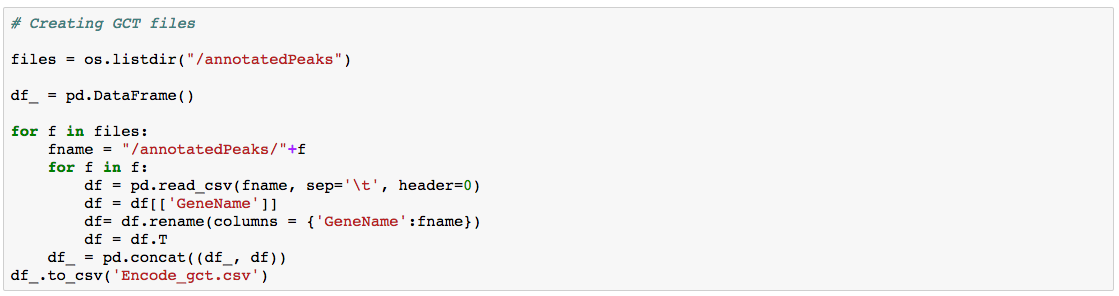

In [574]:
from IPython.display import Image
Image('figures/create_gmt.png', width='1200')


In [ ]:
from IPython.display import Image
Image('figures/gmt_heD.png', width='1200')
gmt_heD.png

df2 = pd.read_csv('Encode_gct.csv', header=0)
df2.head(3)

In [68]:
df2 = pd.read_csv('Encode_gct.csv', header=0)
df2.head(3)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,/Users/Carol/Desktop/annotatedPeaks/ENCFF001XU...,Gm4890,Pts,Mocs3,Catsper2,Nphp3,Zfp953,Gchfr,Btf3,Bcap29,...,Calr,Sos2,Fnbp1l,Gtf3c3,Lrrc20,Snw1,Pdia6,2810001G20Rik,Ptgfrn,Cmss1
1,/Users/Carol/Desktop/annotatedPeaks/ENCFF001XU...,2410131K14Rik,1110002L01Rik,Zfyve16,Cep112,Gnai3,Fer,Cgref1,Insig1,Clptm1,...,Zw10,Sssca1,Setd4,Fam69a,Rpgrip1l,Tmem222,Cant1,Ap2b1,Samd4b,Ttc21b
2,/Users/Carol/Desktop/annotatedPeaks/ENCFF001XU...,Plekha4,Arhgap28,Chrnd,Tnfrsf1a,Cndp2,Smarca2,Arhgef2,Wdr90,Ifitm6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
from IPython.display import Image
Image('figures/Line1.png', width='1000')

# Finding Intersection between datasets
<br>
4 datasets:<br>
    - Newest Encode
    - ChEA 2016
    - RNA-Seq (GEO - Alex Pipeline)
    - CREEDS

TF_CECR = pd.read_csv('input_venn_chea_encode_RNA_creeds.txt',header=0, delimiter='\t')<br>
TF_CECR

In [546]:
TF_CECR = pd.read_csv('input_venn_chea_encode_RNA_creeds.txt',header=0, delimiter='\t')
TF_CECR

,List names,number of elements,number of unique elements
0,CREEDS,870,870
1,ChEA,314,314
2,ENCODE,428,425
3,RNA-Seq,269,269
4,Overall number of unique elements,1544,1544


from IPython.display import Image
Image('figures/venn_tfs_CECR.png', width='900')

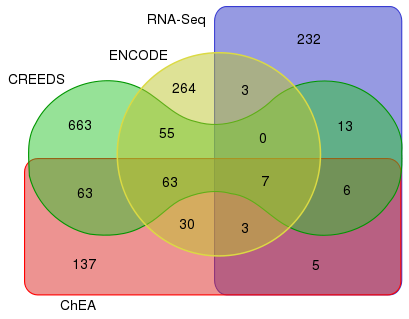

In [547]:
from IPython.display import Image
Image('figures/venn_tfs_CECR.png', width='900')

TF_inter_cecr = pd.read_csv('venn_inter_tfs_cecr.txt', header=0,delimiter='\t')<br>
TF_inter_cecr.head(8)

In [548]:
TF_inter_cecr = pd.read_csv('venn_inter_tfs_cecr.txt', header=0,delimiter='\t')
TF_inter_cecr.head(8)

,Names,total,elements
0,CREEDS ChEA ENCODE RNA-Seq,7.0,IRF1
1,NaN,NaN,ETS2
2,NaN,NaN,NFYA
3,NaN,NaN,YY1
4,NaN,NaN,JUND
5,NaN,NaN,SUZ12
6,NaN,NaN,JUN
7,CREEDS ChEA ENCODE,63.0,EP300


As per Avi suggestion, joinned lists:
    CREEDS and RNA-seq = Expression 
    ENCODE and ChEA = ChIP

TF_EC = pd.read_csv('input_venn_expression_vs_chip.txt',header=0, delimiter='\t')<br>
TF_EC

In [277]:
TF_EC = pd.read_csv('input_venn_expression_vs_chip.txt',header=0, delimiter='\t')
TF_EC

,List names,number of elements,number of unique elements
0,ChIP,742,636
1,Expres,1139,1113
2,Overall number of unique elements,1881,1544


from IPython.display import Image<br>
Image('figures/venn_expression_vs_chip_simetrico.png', width='800')

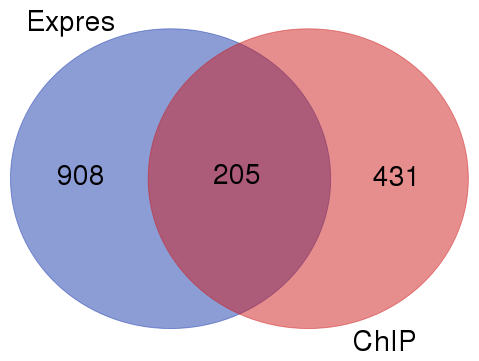

In [279]:
from IPython.display import Image
Image('figures/venn_expression_vs_chip_simetrico.png', width='800')


# TF intersection

common_TF = pd.read_csv('205_common_TFs.txt',header=None, delimiter='\t')<br>
common_TF


In [280]:
common_TF = pd.read_csv('205_common_TFs.txt',header=None, delimiter='\t')
common_TF


,0
0,BP1
1,FOXP1
2,E4F1
3,RBPJ
4,TCF21
5,GATA1
6,HOXA2
7,STAT3
8,TP63
9,STAT6


<br><br><br>

# END lab meeting

<br><br><br><br><br><br><br><br><br>

In [ ]:
# Venn diagram variations

# CREEDS & ENCODE & RNA-Seq

CREEDS which single genes are transcription factors?

In [203]:
TF_inter = pd.read_csv('INTER_LIST_venn_ENCODE_RNA_CREEDS.txt', header=0,delimiter='\t')
TF_inter.head(7)

,Names,total,elements
0,CREEDS ENCODE RNA-Seq,7.0,IRF1
1,NaN,NaN,ETS2
2,NaN,NaN,NFYA
3,NaN,NaN,YY1
4,NaN,NaN,JUND
5,NaN,NaN,SUZ12
6,NaN,NaN,JUN


In [44]:
TF_ref = pd.read_csv("/Users/Carol/Desktop/TFs_human_mouse_annotation.txt", header=0, delimiter ='\t')
TF_ref.head(5)

,Symbol,EntrezGene,Name,Score,Taxid,ID
0,Ddx5,13207,DEAD_(Asp-Glu-Ala-Asp)_box_polypeptide_5,16.803167,10090,13207
1,Gata5,14464,GATA_binding_protein_5,18.483624,10090,14464
2,Rb1,19645,retinoblastoma_1,16.801758,10090,19645
3,Ssrp1,20833,structure_specific_recognition_protein_1,18.484290,10090,20833
4,Nkx2-5,18091,NK2_homeobox_5,18.483100,10090,18091


In [200]:
# from IPython.display import Image
# from IPython.display import display
# x = Image(filename='figures/Enconde&Creeds.png') 
# y = Image(filename='figures/Cre&En_TFs.png') 
# z = Image(filename='figures/interceccao_TF_Cre_EN_rn.png') 
# display(x, y,z)

In [207]:
TF_inp = pd.read_csv('input_venn.txt', header = 0, delimiter = '\t')
TF_inp

,List names,number of elements,number of unique elements
0,CREEDS,870,870
1,ENCODE,428,425
2,RNA-Seq,269,269
3,Overall number of unique elements,1407,1407


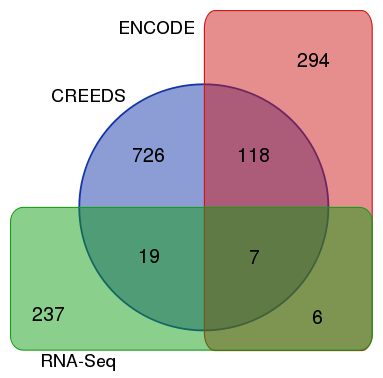

In [272]:
from IPython.display import Image
Image('figures/venn_ENCODE_RNA_CREEDS.png', width='300')

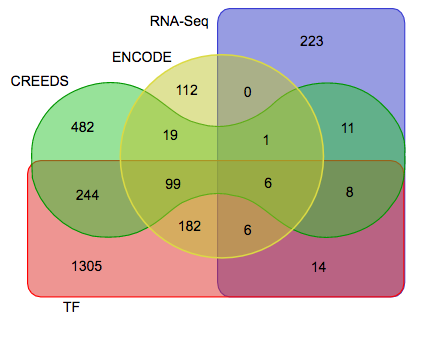

In [271]:
from IPython.display import Image
Image('figures/TF_ENCODE_CRE_RNA.png', width='300')

___________________

In [ ]:
#Only Looking at Narrow Peaks

In [84]:
# Narrow Peaks
encode_metadata_mm9 = pd.read_csv('mm9_metadata.csv')
#encode_metadata_mm9.shape
#list(encode_metadata_mm9)

encode_metadata_mm9_narrow = encode_metadata_mm9[encode_metadata_mm9.File_format == 'bed narrowPeak']
encode_metadata_mm9_narrow.shape

(102, 48)

In [98]:
path = '/Users/Carol/Desktop/EncodeUCSC/bedFile/' 
print path
files = glob.glob(os.path.join(path, '*.txt')) # All txt files in folder
fids = np.unique([file.split('_')[0] for file in files])  ## unique accession IDs


# f_list=['ENCSR000EQW','ENCSR000ERC','ENCSR000EQQ','ENCSR000ERK','ENCSR980YXJ','ENCSR906QEK','ENCSR806JZK','ENCSR000ERL','ENCSR000EQT','ENCSR000CFK','ENCSR000ERG','ENCSR000CFJ','ENCSR000CBM','ENCSR000EQX','ENCSR000CBX','ENCSR000ERO','ENCSR000ERI','ENCSR000DIU','ENCSR000DIU','ENCSR000DIU','ENCSR000EQV','ENCSR000EQU','ENCSR000ERB','ENCSR000ERM','ENCSR000ERF','ENCSR000ERJ','ENCSR779CZG','ENCSR779CZG','ENCSR779CZG','ENCSR743ZJL','ENCSR000CEF','ENCSR973SOG','ENCSR000CBW','ENCSR000AID','ENCSR000CBV','ENCSR000DIJ','ENCSR000DIJ','ENCSR000DIJ','ENCSR000DIJ','ENCSR000EQP','ENCSR000CBL','ENCSR000ETS','ENCSR000ESL','ENCSR000ETV','ENCSR000CDY','ENCSR000CBQ','ENCSR000ERU','ENCSR000AIT','ENCSR000CEG','ENCSR392DGA','ENCSR392DGA','ENCSR392DGA','ENCSR000ERP','ENCSR000DIH','ENCSR000DIH','ENCSR000DIH','ENCSR000EQR','ENCSR000CBT','ENCSR000CBN','ENCSR000CEE','ENCSR000EQZ','ENCSR000CDX','ENCSR000CCB','ENCSR000CCD','ENCSR000ESI','ENCSR000ETQ','ENCSR000ERN','ENCSR000ERD','ENCSR000AIB','ENCSR000AIB','ENCSR000ESF','ENCSR000EQO','ENCSR000ETY','ENCSR000ERW','ENCSR000ERV','ENCSR000DIP','ENCSR000DIP','ENCSR000DIP','ENCSR705HGT','ENCSR000EQS','ENCSR604XDL','ENCSR000DIC','ENCSR000DIC','ENCSR000DIC','ENCSR349JDH','ENCSR000AIN','ENCSR000ETL','ENCSR000AII','ENCSR000ETW','ENCSR000ERQ','ENCSR000ERR','ENCSR000AIG','ENCSR000ERX','ENCSR000ESJ','ENCSR000ESD','ENCSR000AIQ','ENCSR000DHD','ENCSR000DHD','ENCSR000DHD','ENCSR000EUC','ENCSR000AIS','ENCSR000ESN','ENCSR000AIM','ENCSR000ETN','ENCSR531HWD','ENCSR000ESM','ENCSR000AIF','ENCSR000CBU','ENCSR000ESE','ENCSR867SDZ','ENCSR000DIE','ENCSR000DIE','ENCSR000DIE','ENCSR000DHC','ENCSR000CBR','ENCSR000ESG','ENCSR000CDZ','ENCSR000DIB','ENCSR000DIB','ENCSR000DIB','ENCSR000DIB','ENCSR000ESH','ENCSR000CBP','ENCSR362VNF','ENCSR362VNF','ENCSR362VNF','ENCSR000CCC','ENCSR000EUG','ENCSR000DHE','ENCSR000DHE','ENCSR000DHE','ENCSR000DHE','ENCSR000DHE','ENCSR000DIN','ENCSR000DIN','ENCSR000DIN','ENCSR000AIW','ENCSR000ETF','ENCSR000CBO','ENCSR000ETZ','ENCSR000AIO','ENCSR000CEA','ENCSR000CFI','ENCSR000AIH','ENCSR000EQY','ENCSR293WTN','ENCSR033OWC','ENCSR000DIL','ENCSR000DIL','ENCSR000DIL','ENCSR000ERA','ENCSR000ERE','ENCSR000CBS','ENCSR000ETK','ENCSR000AIJ','ENCSR000DIS','ENCSR000DIS','ENCSR000DIS','ENCSR000CBK','ENCSR000CED','ENCSR000EUA','ENCSR000EUB','ENCSR000AIX','ENCSR000ETC','ENCSR000ETB','ENCSR135SWH','ENCSR000AIR','ENCSR000ETU','ENCSR000ESX','ENCSR000AIC','ENCSR000AIP','ENCSR000CFH','ENCSR000ETP','ENCSR000AIK','ENCSR000ETR','ENCSR000ETO','ENCSR000DIA','ENCSR000DIA','ENCSR000DIA','ENCSR000ETX','ENCSR000ESK','ENCSR000AIL','ENCSR000AIE','ENCSR000AIV','ENCSR000CCA','ENCSR000CBI','ENCSR000CEH','ENCSR000CEC','ENCSR000CBZ','ENCSR000CEB','ENCSR000CBJ','ENCSR000CBY','ENCSR000CEI']
for fid in fids:
    df_ = pd.DataFrame()
    print fid
#     if fid in f_list:
#         df_ = pd.DataFrame()
#         for fname in files:
#             if fid in fname:
#                 df = pd.read_csv(fname, sep='\t', header=0)
#                 df.columns = ['ID ', 'Chr', 'Start', 'End', 'Strand', 'Peak Score', 
#                               'Focus Ratio/Region Size', 'Annotation', 'Detailed Annotation', 
#                               'Distance', 'PromoterID', 'EntrezID', 'Unigene', 'Refseq', 'Ensembl', 
#                               'GeneName', 'GeneAlias', 'GeneDescription', 'GeneType']
#                 df_ = pd.concat((df_, df))
#         df_ = df_.groupby('GeneName').agg(np.mean) # group duplicated genes by the mean
#         # Here groupby is combining the results into a data structure based on the mean. groupby gene name than aplly the the function mean 
#         # to the resulting groups
#         df = df_[(df_.Distance <= 2000) & (df_.Distance >= -2000)] # Use a single column's value to select data
#         # reindexing allows you to add/change/delete the index on a specified axis
#         df = df.reindex(df.Distance.abs().sort_values(inplace=False, ascending=True).index) # sorts by abs value, then reorganizes gene column with the index
#         df_2000 = df[:3000]
#         df_2000.to_csv(fid,sep='\t') # save output file by file name

/Users/Carol/Desktop/EncodeUCSC/bedFile/


In [108]:
# 
import glob
import numpy as np


path = '/Users/Carol/Desktop/EncodeUCSC/bedFiles/' ## NOVA pasta

# files = glob.glob(os.path.join(path, '*.txt')) # All txt files in folder
# fids = np.unique([file.split('_')[0] for file in files])  ## unique accession IDs
#f_list = ['ENCFF001XUR_2_1.txt','ENCFF001XUS_1_1.txt','ENCFF001XVE_1_1.txt','ENCFF001XVC_1_1.txt','ENCFF001XVN_1_1.txt','ENCFF001XVD_1_1.txt','ENCFF001XVI_1_1.txt','ENCFF001XVH_1_1.txt','ENCFF001XUV_1_1.txt','ENCFF001XUU_1_1.txt','ENCFF001XUW_1_1.txt','ENCFF001XUX_1_1.txt','ENCFF001XVK_1_1.txt','ENCFF001XVL_1_1.txt','ENCFF001XUY_1_1.txt','ENCFF001XVM_1_1.txt','ENCFF001XVO_1_1.txt','ENCFF001XVG_1_1.txt','ENCFF001XUZ_1_1.txt','ENCFF001XVJ_1_1.txt','ENCFF001XUT_1_1.txt','ENCFF001XVF_1_1.txt','ENCFF001XVA_1_1.txt','ENCFF001YIT_0_0.txt','ENCFF001YIU_0_0.txt','ENCFF001YIR_0_0.txt','ENCFF001YIA_0_0.txt','ENCFF001YIH_0_0.txt','ENCFF001YIE_0_0.txt','ENCFF001YHZ_0_0.txt','ENCFF001YHR_0_0.txt','ENCFF001YIS_0_0.txt','ENCFF001YIP_0_0.txt','ENCFF001YIM_0_0.txt','ENCFF001YHV_0_0.txt','ENCFF001YHY_0_0.txt','ENCFF001YIC_0_0.txt','ENCFF001YHQ_0_0.txt','ENCFF001YIG_0_0.txt','ENCFF001YIF_0_0.txt','ENCFF001YHS_0_0.txt','ENCFF001YIN_0_0.txt','ENCFF001YII_0_0.txt','ENCFF001YIQ_0_0.txt','ENCFF001YIL_0_0.txt','ENCFF001YID_0_0.txt','ENCFF001YHW_0_0.txt','ENCFF001YHU_0_0.txt','ENCFF001YHT_0_0.txt','ENCFF001YIO_0_0.txt','ENCFF001YIJ_0_0.txt','ENCFF001YIB_0_0.txt','ENCFF001YHX_0_0.txt','ENCFF001YIY_0_0.txt','ENCFF001YIX_0_0.txt','ENCFF001YIV_0_0.txt','ENCFF001YKM_0_0.txt','ENCFF001YKN_0_0.txt','ENCFF001YKL_0_0.txt','ENCFF001YJO_0_0.txt','ENCFF001YIZ_0_0.txt','ENCFF001YJF_0_0.txt','ENCFF001YKG_0_0.txt','ENCFF001YJW_0_0.txt','ENCFF001YJT_0_0.txt','ENCFF001YJN_0_0.txt','ENCFF001YJA_0_0.txt','ENCFF001YKK_0_0.txt','ENCFF001YJK_0_0.txt','ENCFF001YKE_0_0.txt','ENCFF001YKJ_0_0.txt','ENCFF001YJR_0_0.txt','ENCFF001YKF_0_0.txt','ENCFF001YJU_0_0.txt','ENCFF001YJB_0_0.txt','ENCFF001YJY_0_0.txt','ENCFF001YJI_0_0.txt','ENCFF001YJD_0_0.txt','ENCFF001YKD_0_0.txt','ENCFF001YJV_0_0.txt','ENCFF798RJI_0_0.txt','ENCFF001YKI_0_0.txt','ENCFF001YJS_0_0.txt','ENCFF001YJJ_0_0.txt','ENCFF001YJP_0_0.txt','ENCFF001YJE_0_0.txt','ENCFF001YKH_0_0.txt','ENCFF001YKA_0_0.txt','ENCFF001YJM_0_0.txt','ENCFF445ZZT_0_0.txt','ENCFF846TAQ_0_0.txt','ENCFF811MVO_0_0.txt','ENCFF739EJW_0_0.txt','ENCFF530LPO_0_0.txt','ENCFF883ROD_0_0.txt','ENCFF316CSW_0_0.txt','ENCFF287QGR_0_0.txt','ENCFF148PLM_0_0.txt','ENCFF139PSX_0_0.txt','ENCFF847YWU_0_0.txt','ENCFF996YQZ_0_0.txt','ENCFF439VGN_0_0.txt']
f_list = ['/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUR_2_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUS_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVE_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVC_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVN_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVD_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVI_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVH_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUV_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUU_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUW_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUX_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVK_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVL_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUY_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVM_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVO_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVG_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUZ_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVJ_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUT_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVF_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XVA_1_1.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIT_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIU_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIR_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIA_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIH_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIE_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHZ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHR_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIS_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIP_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIM_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHV_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHY_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIC_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHQ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIG_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIF_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHS_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIN_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YII_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIQ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIL_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YID_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHW_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHU_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHT_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIO_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIJ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIB_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YHX_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIY_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIX_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIV_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKM_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKN_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKL_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJO_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YIZ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJF_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKG_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJW_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJT_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJN_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJA_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKK_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJK_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKE_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKJ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJR_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKF_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJU_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJB_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJY_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJI_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJD_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKD_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJV_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF798RJI_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKI_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJS_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJJ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJP_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJE_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKH_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YKA_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001YJM_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF445ZZT_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF846TAQ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF811MVO_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF739EJW_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF530LPO_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF883ROD_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF316CSW_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF287QGR_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF148PLM_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF139PSX_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF847YWU_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF996YQZ_0_0.txt','/Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF439VGN_0_0.txt']
for f in f_list:
    df_ = pd.DataFrame()
    if f in f_list:
        df = pd.read_csv(f, sep='\t', header=0)
        df.columns = ['ID ', 'Chr', 'Start', 'End', 'Strand', 'Peak Score', 'Focus Ratio/Region Size', 'Annotation', 'Detailed Annotation', 'Distance', 'PromoterID', 'EntrezID', 'Unigene', 'Refseq', 'Ensembl', 'GeneName', 'GeneAlias', 'GeneDescription', 'GeneType']
        df_ = pd.concat((df_, df))
df_ = df_.groupby('GeneName').agg(np.mean) # group duplicated genes by the mean
# Here groupby is combining the results into a data structure based on the mean . groupby gene name than aplly the the function mean 
#to the resulting groups
df = df_[(df_.Distance <= 2000) & (df_.Distance >= -2000)] # Use a single column's value to select data
#reindexing allows you to add/change/delete the index on a specified axis
#this returns a copy of the data
df = df.reindex(df.Distance.abs().sort_values(inplace=False, ascending=True).index) #sorts by abs value, then reorganizes gene column with the index
df_2000 = df[:3000]
df_2000.to_csv(fid,sep='\t')

IOError: File /Users/Carol/Desktop/EncodeUCSC/bedFile/ENCFF001XUR_2_1.txt does not exist

In [ ]:
### FAZER VENN di com estatistica e tudo http://bioinformatics.psb.ugent.be/cgi-bin/liste/Venn/calculate_venn.htpl
# SAo as listas de cada um
List names	number of elements	number of unique elements
CREEDS	870	870
ENCODE	428	425
RNA-Seq	269	269
TF	1865	1864
Overall number of unique elements	2712